In [1]:
import pandas as pd
import numpy as np
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df=pd.read_csv(path)

In [2]:
%%capture
! pip install seaborn

In [3]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [4]:
df.head()
df["drive-wheels"].value_counts()
dc=df["drive-wheels"].value_counts().to_frame()
dc.rename(columns={'drive-wheels' : 'd_count'} , inplace=True)
dc.index.name="drive-wheels"
df['drive-wheels'].unique()
group=df[['drive-wheels','body-style','price']]
group = group.groupby(['drive-wheels' , 'body-style'],as_index=False).mean()
group_pivot=group.pivot(index="drive-wheels",columns="body-style")
group_pivot=group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

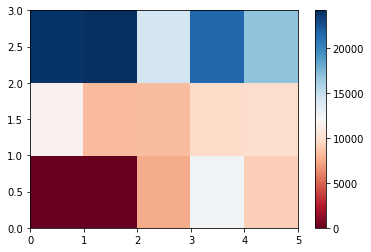

In [44]:
plt.pcolor(group_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

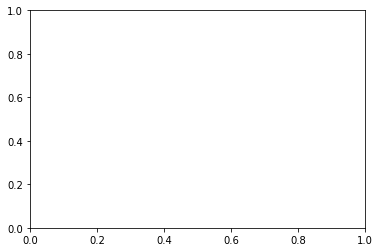

In [45]:
fig , ax =plt.subplots()

In [38]:
im=ax.pcolor(group_pivot , cmap='RdBu')
row = group_pivot.columns.levels[1]
col = group_pivot.index
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)


In [39]:
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)


In [40]:
ax.set_xticklabels(row, minor=False)


[Text(0,0,'convertible'),
 Text(0.2,0,'hardtop'),
 Text(0.4,0,'hatchback'),
 Text(0.6,0,'sedan'),
 Text(0.8,0,'wagon')]

In [41]:
ax.set_yticklabels(col, minor=False)

[Text(0,0,'4wd'), Text(0,0.2,'fwd'), Text(0,0.4,'rwd')]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

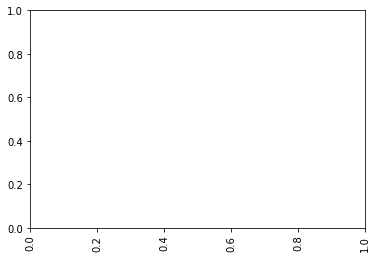

In [42]:
plt.xticks(rotation=90)


In [43]:
fig.colorbar(im)
plt.show()